In [75]:
import csv
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [76]:
analyzer = SentimentIntensityAnalyzer()

In [77]:
File = pd.read_csv('Reddit_Comments.csv')

In [78]:
File["Compound"] = ""
File["Postivity"] = ""
File["Negativity"] = ""
File["Neutral"] = ""
File["Polarity"] = ""
File["Subjectivity"] = ""

In [79]:
File.head()

,Unnamed: 0,ico,comment,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,5578,superdao,<1. Describe SuperDAO in your own words and wh...,,,,,,
1,5579,superdao,"not now, but soon",,,,,,
2,5580,superdao,Its possible to buy now tokens?,,,,,,
3,5581,superdao,We would love to have them as soon as possible...,,,,,,
4,5582,superdao,when is the audits expected to be done?,,,,,,


In [80]:
for index,row in File.iterrows():
#     print(row)
    sentence = row['comment']
    print(sentence)
    blob = TextBlob(sentence)
    print("Polarity: ", blob.sentiment.polarity, "Subjectivity: ",blob.sentiment.subjectivity)
    compound = analyzer.polarity_scores(row['comment'])["compound"]
    pos = analyzer.polarity_scores(row['comment'])["pos"]
    neu = analyzer.polarity_scores(row['comment'])["neu"]
    neg = analyzer.polarity_scores(row['comment'])["neg"]
    print("Compound: ", compound, "Positivity: ", pos, "Neutral: ", neu, "Negative: ",neg)
    
    File.set_value(index, "Polarity", blob.sentiment.polarity)
    File.set_value(index, "Subjectivity", blob.sentiment.subjectivity)
    File.set_value(index, "Compound", compound)
    File.set_value(index, "Postivity", pos)
    File.set_value(index, "Negativity", neu)
    File.set_value(index, "Neutral", neg)


<1. Describe SuperDAO in your own words and what you think its potential is? 

Answer: An Autonomous and functional system, that's works by following it's own holders and contributors order regerding on their reputation! After DAO masses something likes superDAO can eassilly show the real potential of DAO! It was very much nedded. And I'm glad to see that's already happing.

>2. What do you think of SuperDAO Products? 

Answer: I'm start to feeling very excited after seeing diffarent use case of SuperDAO! In crypto that's become missing links from so many projects. 
I love the ad platform idea. And believe that could create buzz on current market system, if everything happens as promised! 

>3. What are the benefits of Superneum Tokens (SUP)? 

Answer: As far I understood, SUP will be the main access tokens for navigating any of SuperDAO features! If that's the thing, then holding SUP means it will only grow day by days!
 
Etherurm address:
0x5Cfe303601B458D56Fb0fA51BCF94E457Ca23AA2

T

In [81]:
File.head()

,Unnamed: 0,ico,comment,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,5578,superdao,<1. Describe SuperDAO in your own words and wh...,0.9755,0.16,0.828,0.012,0.263395,0.65402
1,5579,superdao,"not now, but soon",0,0,1,0,0,0
2,5580,superdao,Its possible to buy now tokens?,0,0,1,0,0,1
3,5581,superdao,We would love to have them as soon as possible...,0.6369,0.104,0.896,0,0.125,0.4625
4,5582,superdao,when is the audits expected to be done?,0,0,1,0,-0.1,0.4


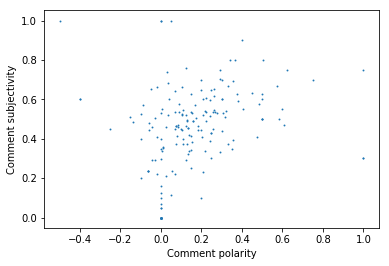

In [82]:
plt.scatter(File['Polarity'], File['Subjectivity'], s=0.8)
plt.xlabel('Comment polarity')
plt.ylabel('Comment subjectivity')
# plt.xlim(-1.1, 1.1)
# plt.ylim(-0.1, 1.1)
plt.show()

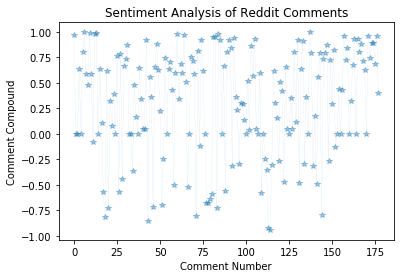

In [83]:
# Create plot
plt.plot(np.arange(len(File["Compound"])),
         File["Compound"], marker="*", linewidth=0.1,
         alpha=0.4)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Reddit Comments")
plt.ylabel("Comment Compound")
plt.xlabel("Comment Number")
plt.show()

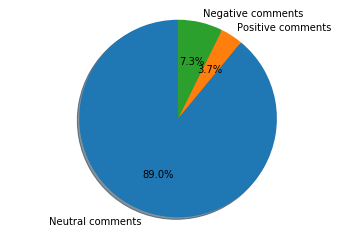

In [84]:
positive_polarity = [p for p in File['Postivity'] if p>0.5]
negative_polarity = [n for n in File['Negativity'] if n<0.5]
neutral_polarity = [r for r in File['Neutral'] if r==0]

total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size

labels = ['Neutral comments', 'Positive comments', 'Negative comments']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()